## 1. O Algoritmo Naive Bayes

O **Naive Bayes** (NB) pertence a uma classe de métodos em Aprendizado de Máquina (AM) conhecidos como **"Métodos Probabilistícos"**. Tais algoritmos de AM supervisionado tem como inspiração a aplicação do Teorema de Bayes, fazendo uma suposição 'naive' de independência entre os atributos preditivos $\textbf{X}$. Isso significa que supomos que **não há dependência entre dois ou mais atributos** no conjunto de dados.

Segue abaixo o Teorema de Bayes:

\begin{equation*}
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
\end{equation*}


* $P(A|B)$ é chamado de `posterior`
* $P(B|A)$ é chamado de `likelihood`
* $P(A)$ é chamado de `prior`
* $P(B)$ é chamado de `evidence`


Logo:

\begin{equation*}
posterior = \frac{likelihood \times prior}{evidence}
\end{equation*}


Adaptando o teorema para AM, temos:
* $C$ o conjunto das possíveis classes que um conjunto de dados pode assumir
* $c_k$ é a k-ésima classe
* $\textbf{x}$ é um exemplo do conjunto de dados
* $x_j$ é o j-ésimo atributo do exemplo, onde $j=1,2,3, \cdots, m$

Então:
\begin{equation*}
P(c_k | \textbf{x}) = \frac{P(\textbf{x} | c_k) P(c_k)}{P(\textbf{x})}
\end{equation*}

\begin{equation*}
P(c_k | x_1, x_2, \cdots, x_m) = \frac{P(x_1, x_2, \cdots, x_m | c_k) P(c_k)}{P(x_1, x_2, \cdots, x_m)}
\end{equation*}

Usando a suposição 'naive' que assumimos, temos que :
\begin{equation*}
P(x_j | x_1, x_2, \cdots, x_{j-1}, x_{j+1}, \cdots, x_m, c_k) = P(x_j | c_k)
\end{equation*}

Então, o teorema de bayes com a suposição 'naive' pode ser escrito como:
\begin{equation*}
P(c_k | x_1, x_2, \cdots, x_m) = \frac{P(c_k) \prod^m_{j=1} P(x_j | c_k)}{P(x_1, x_2, \cdots, x_m)}
\end{equation*}

Como não conhecemos a distribuição dos dados, não podemos calcular a `evidence`.
Contudo, como ela é apenas um **fator de ajuste constante** para as diferentes possíveis classes $c_k$, podemos desconsiderar esse cálculo. Com isso, não utilizaremos mais a probabilidade para determinar a classe, mas sim uma **proporção**. Logo:

\begin{equation*}
P(c_k | x_1, x_2, \cdots, x_m) \propto P(c_k) \prod^m_{j=1} P(x_j | c_k)
\end{equation*}

Desta maneira o Algoritmo NB pode ser descrito matematicamente como:
\begin{equation*}
\hat{c}^i = \underset{c_k \in C}{\operatorname{argmax}} P(c_k) \prod^m_{j=1} P(x_j | c_k)
\end{equation*}

Para o computador somar é mais fácil do que multiplicar. Além disso, quando multiplicamos números muito pequenos, pode ser que a mantissa do float não seja suficiente.

Desta maneira o Algoritmo NB pode ser descrito matematicamente de forma aditiva como:

\begin{equation*}
log(P(c_k | x_1, x_2, \cdots, x_m)) \propto log(P(c_k)) + \sum^m_{j=1} log(P(x_j | c_k))
\end{equation*}

\begin{equation*}
\hat{c}^i = \underset{c_k \in C}{\operatorname{argmax}} log(P(c_k)) + \sum^m_{j=1} log(P(x_j | c_k))
\end{equation*}

Perceba que para computar o `likelihood` precisamos assumir alguma distribuição para os dados. 

Vamos gerar um dataset com três classes onde os atributos parecem seguir Gaussianas:

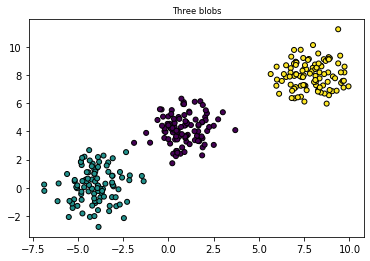

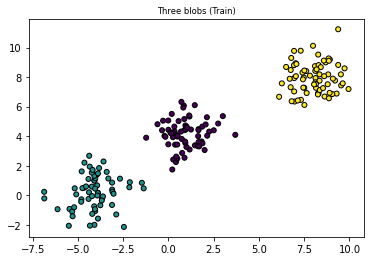

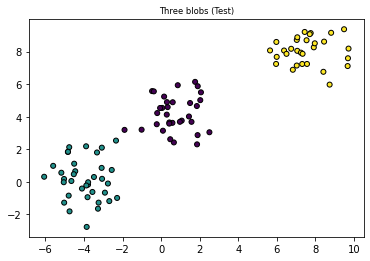

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

 
plt.title("Three blobs", fontsize='small')
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

# dividindo os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

plt.title("Three blobs (Train)", fontsize='small')
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()


plt.title("Three blobs (Test)", fontsize='small')
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test,
            s=25, edgecolor='k')
plt.show()



### 1.1 Naive Bayes Categórico

O NB Categórico, como o nome já diz, assume que o conjunto de dados é categórico.

Podemos então calcular a `likelihood` por meio de contagem simples:
* $t$ uma dada categoria
* $c$ uma dada classe
* $N_{cjt}$ é a quantidade de vezes que a categoria $t$ aparece com classe $c$ para o j-ésimo atributo.
* $N_c$ é o número de exemplos que tem classe $c$
* $\alpha$ um fator de ajuste que evita divisão por zero
* $n_j$ é o número de categorias possíveis para o j-ésimo atributo


\begin{equation*}
P(x_j = t | c_k = c) = \frac{N_{cjt} + \alpha}{ N_{c} + \alpha n_j}
\end{equation*}

Para usá-lo é necessário categorizar os dados se estes já não estiverem categorizados.

In [2]:
import numpy as np

class CategoricalNB:
    def __init__(self, alpha=1.0, verbose=False):
        self.alpha = alpha
        self.verbose = verbose
        
    def compute_priors(self, y):
        # vamos calcular os priors e salvar em self
        names, counts = np.unique(y, return_counts=True)
        n_c = y.shape[0]
        
        self.C = names
        self.priors = {c: count/n_c for c, count in zip(names, counts)} # aqui esta P(c_k)
        
        if self.verbose:
            print("Classes = ", self.C)
            print("Priors por classe ", self.priors, "\n")
        
    def compute_likelihoods(self, X):
        m = X.shape[1] # numero de atributos
        C = self.C # as diferentes classes
        alpha = self.alpha 
        
        likelihoods = {}
        for c in C:  # para cada classe
            Xc = X[y == c]  # exemplos que pertencem a classe c
            Nc = len(Xc)  # quantidade de exemplos que pertencem a classe c

            likelihoods[c] = {} # dicionario para guardar os valores de likelihood para classe c
            
            for j in range(m):  # para cada atributo preditivo (ou feature)
                x_j = Xc[:, j]  # pegamos todos exemplos da coluna j da classe c
                T, N_cj = np.unique(x_j, return_counts=True)  # retorna os nomes das categorias e as contagens
                n_j = len(T) # numero de categorias possiveis
                
                likelihoods[c][j] = {} # dicionario para guardar os valores de likelihood para classe c e atributo j
                
                for N_cjt, t in zip(N_cj, T):
                    likelihoods[c][j][t] = (N_cjt * alpha) / (Nc + (n_j*alpha)) # calculo da prob. condicional
                        
        self.likelihoods = likelihoods

    def fit(self, X, y):        
        # computar os priors
        self.compute_priors(y)
        
        # computar todas as possiveis likelihoods
        self.compute_likelihoods(X)
        
        return self
        
    def predict_proba(self, X):
        C = self.C
        n = X.shape[0]
        likelihoods = self.likelihoods
        priors = self.priors

    
        y_prob = np.zeros((n, len(self.C))) # vetor para colocar probabilidades
        for i, x in enumerate(X): # para cada exemplo recebido
            c_prop = np.zeros(C.shape)
            
            for idx, c in enumerate(C): # para cada classe, calcular a proporcao
                prod = 1
                for j, t in enumerate(x):
                    if t in likelihoods[c][j]:
                        prod *= likelihoods[c][j][t]
                    else:
                        prod *= 0 

                c_prop[idx] = priors[c] * prod # calculo da proporcao

            y_prob[i] = c_prop/np.sum(c_prop)

            if self.verbose:
                print("Exemplo de treino ", i)
                print("Proporção por classe: ", c_prop)
                print("Probabilidade: ", y_prob[i], "\n")

        return y_prob
                
    def predict(self, X):
        y_prop = self.predict_proba(X)  # calculo da probabilidades
        C = self.C  # classes possiveis
        n = X.shape[0] # numero de linhas
        
        class_id = np.argmax(y_prop, axis=1)
        return C[class_id]

In [3]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(6, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])

clf = CategoricalNB(verbose=True)
clf.fit(X, y)

print(clf.predict(X[2:4]))

Classes =  [1 2 3 4 5 6]
Priors por classe  {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666} 

Exemplo de treino  0
Proporção por classe:  [0.00000000e+00 0.00000000e+00 1.31476818e-31 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Probabilidade:  [0. 0. 1. 0. 0. 0.] 

Exemplo de treino  1
Proporção por classe:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.31476818e-31
 0.00000000e+00 0.00000000e+00]
Probabilidade:  [0. 0. 0. 1. 0. 0.] 

[3 4]


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)
# dividindo os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

pipe = Pipeline([
    ('kbdis', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    ('clf', CategoricalNB()),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia é: ", acc)

Acurácia é:  0.98989898989899


### 1.2 Naive Bayes Gussiano

O NB Gaussiano, assume que o conjunto de dados é numérico e que os atributos preditivos seguem uma distribuição Gaussiana.

Portanto a `likelihood` pode ser obtida da seguinte maneira:
* $\sigma^2_{c_k}$ variância
* $\mu_{c_k}$ média


\begin{equation*}
P(x_j | c_k) = \frac{1}{\sqrt{2 \pi \sigma^2_{c_k}}} exp \Big(- \frac{(x_j - \mu_{c_k})^2}{2 \sigma^2_{c_k}} \Big)
\end{equation*}



In [5]:
import numpy as np

class GaussianNB:
    def __init__(self, verbose=False):
        self.verbose = verbose
        
    def compute_priors(self, y):
        # vamos calcular os priors e salvar em self
        names, counts = np.unique(y, return_counts=True)
        n_c = y.shape[0]
        
        self.C = names
        self.priors = {c: count/n_c for c, count in zip(names, counts)} # aqui esta P(c_k)
        
        if self.verbose:
            print("Classes = ", self.C)
            print("Priors por classe ", self.priors, "\n")
        
    def compute_mu_sigma(self, X, y):
        C = self.C
        
        mu = {}
        sigma2 = {}
        for c in C:  # para cada classe
            Xc = X[y==c]
            mu[c] = np.mean(Xc, axis=0) # calcula media para cada atributo
            sigma2[c] = np.var(Xc, axis=0) # calcula o desvio padrao para cada atributo
        
        self.sigma2 = sigma2
        self.mu = mu

    def fit(self, X, y):        
        # calcular os priors
        self.compute_priors(y)
        
        # calcular todas as medias e variancias
        self.compute_mu_sigma(X, y)
        
        return self
        
    def predict_proba(self, X):
        C = self.C
        n = X.shape[0]
        priors = self.priors
        sigma2 = self.sigma2
        mu = self.mu

    
        y_prob = np.zeros((n, len(self.C))) # vetor para colocar probabilidades
        for i, x in enumerate(X): # para cada exemplo recebido
            c_prop = np.zeros(C.shape)
            
            for idx, c in enumerate(C): # para cada classe, calcular a proporcao
                summ = 0
                for j, x_j in enumerate(x):
                    summ += np.log(( 1.0 / np.sqrt( 2*np.pi*sigma2[c][j]) ) * np.exp(
                            ( - (x_j - mu[c][j])**2 / (2*sigma2[c][j]) )
                        ))
                c_prop[idx] = np.log(priors[c]) + summ
            
            exp_proba = np.exp(c_prop)           
            y_prob[i] = exp_proba/np.sum(exp_proba)
            
            if self.verbose:
                print("Exemplo de treino ", i)
                print("Proporção por classe: ", c_prop)
                print("Probabilidade: ", y_prob[i], "\n")
                
        return y_prob
    

    def predict(self, X):
        y_prop = self.predict_proba(X)  # calculo da probabilidades
        C = self.C  # classes possiveis
        n = X.shape[0] # numero de linhas
        
        class_id = np.argmax(y_prop, axis=1)
        return C[class_id]

In [6]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) 
Y = np.array([1, 1, 1, 2, 2, 2])
clf = GaussianNB(verbose=True)
clf.fit(X, Y)

print(clf.predict(np.array([[-0.8, -1]])))
print()
print(clf.predict(np.array([[0.8, 1]])))

Classes =  [1 2]
Priors por classe  {1: 0.5, 2: 0.5} 

Exemplo de treino  0
Proporção por classe:  [ -2.90625299 -19.70625299]
Probabilidade:  [9.99999949e-01 5.05653109e-08] 

[1]

Exemplo de treino  0
Proporção por classe:  [-19.70625299  -2.90625299]
Probabilidade:  [5.05653109e-08 9.99999949e-01] 

[2]


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=3)
# dividindo os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

pipe = Pipeline([
    ('clf', GaussianNB()),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia é: ", acc)

Acurácia é:  1.0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# recuperando conjunto de dados
data = load_iris()
X, y = data['data'], data['target']
print(X.shape)
print(y.shape)

# dividindo os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred)

print("Acc do NB é: ", acc_nb)

(150, 4)
(150,)
Acc do NB é:  0.96


### 1.4. Usando os NB vistos para classificação de texto

In [13]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

X_train = twenty_train.data
y_train = twenty_train.target
y_names = twenty_train.target_names

print(X_train[3])
print(y_train[0:20])
print(y_names)

From: s0612596@let.rug.nl (M.M. Zwart)
Subject: catholic church poland
Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL
Lines: 10

Hello,

I'm writing a paper on the role of the catholic church in Poland after 1989. 
Can anyone tell me more about this, or fill me in on recent books/articles(
in english, german or french). Most important for me is the role of the 
church concerning the abortion-law, religious education at schools,
birth-control and the relation church-state(government). Thanx,

                                                 Masja,
"M.M.Zwart"<s0612596@let.rug.nl>

[1 1 3 3 3 3 3 2 2 2 3 1 0 0 1 1 2 0 3 0]
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [14]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test = twenty_test.data
y_test = twenty_test.target
y_names = twenty_test.target_names

print(X_test[0])
print(y_test[0:20])
print(y_names)

From: brian@ucsd.edu (Brian Kantor)
Subject: Re: HELP for Kidney Stones ..............
Organization: The Avant-Garde of the Now, Ltd.
Lines: 12
NNTP-Posting-Host: ucsd.edu

As I recall from my bout with kidney stones, there isn't any
medication that can do anything about them except relieve the pain.

Either they pass, or they have to be broken up with sound, or they have
to be extracted surgically.

When I was in, the X-ray tech happened to mention that she'd had kidney
stones and children, and the childbirth hurt less.

Demerol worked, although I nearly got arrested on my way home when I barfed
all over the police car parked just outside the ER.
	- Brian

[2 2 2 0 3 0 1 3 2 2 1 3 2 3 1 0 1 3 0 0]
['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


Para as soluções abaixo, vamos utilizar a classe `DenseTransformer` que apenas muda o tipo de estrutura de dados i.e., de **sparse matrix** para **dense matrix**.

In [15]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

#### 1.4.1 Solução com o NB categórico

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('to_dense', DenseTransformer()), 
    ('kbdis', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')),
    ('clf', CategoricalNB()),
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia é: ", acc)

Acurácia é:  0.7010652463382158


#### 1.4.2 Solução com o NB Gaussiano

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('to_dense', DenseTransformer()),
    ('clf', GaussianNB()),
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia é: ", acc)

Acurácia é:  0.8841544607190412


#### 1.4.1 Solução com o NB Multinomial

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()), cuidado!
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia é: ", acc)

Acurácia é:  0.9340878828229028


### 1.4. Aspectos Positivos e Negativos

Positivos:
* Fácil de implementar
* Fácil de implementar de forma incremental
* Robusto na presença de ruído
* O desempenho não decresce na presença de atributos irrelevantes

Negativos:
* Independência de atributos não ocorre em muitos problemas reais
* Necessidade de supor distribuição dos dados

### 1.5. Dicas

* Se os dados são Gaussianos então uma boa alternativa é o **Gaussian Naive Bayes**
  * É possível testar normalidade dos dados, veja : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Se os dados forem categóricos uma alternativa é o **Categorical Naive Bayes**
* Se os dados forem desbalanceados uma alternativa é o **Complement Naive Bayes**
    * O problema com desbalanceamento também pode mitigado ajustando o peso dos priors
* Se os seus dados forem binários uma alternativa pode ser o **Bernoulli Naive Bayes**
* Se os seus dados forem textuais um bom baseline é o **Multinomial Naive Bayes**




* Lembre-se de discretizar os dados para usar o **Categorical Naive Bayes**
    * Essa ferramenta é interessante: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
* Lembre-se que os priors podem influenciar (principalmente em dados desbalanceados)

### Referências

* de Carvalho, André C. P. L. F., Lorena, Ana Carolina, João Gama, and Katti Faceli. Inteligência Artificial: Uma abordagem de aprendizado de máquina. Grupo Gen-LTC, 2000. (Capítulo 5)
* Documentação do scikit-learn: https://scikit-learn.org/stable/modules/naive_bayes.html
* Formulação matemática simples: https://en.wikipedia.org/wiki/Naive_Bayes_classifier


## Apêndice A

Neste exemplo, o objetivo é mostrar para vocês como podemos definir matematicamente o NB.
Vamos fazer passo a passo a abertura, fechamento e simplificações das expressões.

Segue abaixo o Teorema de Bayes:

\begin{equation*}
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
\end{equation*}


* $P(A|B)$ é chamado de `posterior`
* $P(B|A)$ é chamado de `likelihood`
* $P(A)$ é chamado de `prior`
* $P(B)$ é chamado de `evidence`


Logo:

\begin{equation*}
posterior = \frac{likelihood \times prior}{evidence}
\end{equation*}


Adaptando o teorema para AM, temos:
* $C$ o conjunto das possíveis classes que um conjunto de dados pode assumir
* $c_k$ com $k=1,2,3, \cdots$, é a k-ésima classe (estamos ordenando o conjunto por conveniência).
* $\langle \textbf{X}, \textbf{y} \rangle \subset \mathcal{D}$ um conjunto de dados rotulado
* $\textbf{y} \subset C^n$ é o vetor de atributos alvo (de classes)
* $\textbf{X} \subset R^n \times R^m$ é a matriz de dados (ou vetor de exemplos)
* $m=$ números de atributos preditivos e $n=$ número de exemplos
* $\textbf{x}^i \in \textbf{X}$ é um exemplo do conjunto de dados, onde $i=1,2,3, \cdots, n$
* $x^i_j \in \textbf{X}$ é o j-ésimo atributo do i-ésimo exemplo, onde $j=1,2,3, \cdots, m$

Então:
\begin{equation*}
P(c_k | \textbf{x}^i) = \frac{P(\textbf{x}^i | c_k) P(c_k)}{P(\textbf{x}^i)}
\end{equation*}

\begin{equation*}
P(c_k | x^i_1, x^i_2, \cdots, x^i_m) = \frac{P(x^i_1, x^i_2, \cdots, x^i_m | c_k) P(c_k)}{P(x^i_1, x^i_2, \cdots, x^i_m)}
\end{equation*}


Abrindo a parte superior pela regra da cadeia:
\begin{align*}
P(x^i_1, x^i_2, \cdots, x^i_m | c_k) P(c_k) &= P(x^i_1, x^i_2, \cdots, x^i_m, c_k) \\
&= P(x^i_1 | x^i_2, x^i_3, \cdots, x^i_m c_k) P(x^i_2, x^i_3, \cdots, x^i_m c_k) \\
&= P(x^i_1 | x^i_2, x^i_3, \cdots, x^i_m c_k) P(x^i_2 | x^i_3, x^i_4, \cdots, x^i_m c_k) P(x^i_3, x^i_4, \cdots, x^i_m c_k) \\
&= \cdots \\
&= P(x^i_1 | x^i_2, x^i_3, \cdots, x^i_m c_k) P(x^i_2 | x^i_3, x^i_4, \cdots, x^i_m c_k) \cdots P(x^i_{m-1} |  x^i_m, c_k)P(x^i_m | c_k)P(c_k)\\
\end{align*}

Usando a suposição 'naive' que assumimos, temos que :
\begin{equation*}
P(x^i_j | x^i_1, x^i_2, \cdots, x^i_{j-1}, x^i_{j+1}, \cdots, x^i_m, c_k) = P(x^i_j | c_k)
\end{equation*}

Logo, aplicando a suposição 'naive' de independência entre os atributos preditivos:
\begin{align*}
P(x^i_1, x^i_2, \cdots, x^i_m | c_k) P(c_k) &= P(x^i_1 | c_k) P(x^i_2 | c_k) \cdots P(x^i_m | c_k) P(c_k) \\
 &= P(c_k) \prod^m_{j=1} P(x^i_j | c_k)
\end{align*}

Então, o teorema de bayes com a suposição 'naive' pode ser escrito como:
\begin{equation*}
P(c_k | x^i_1, x^i_2, \cdots, x^i_m) = \frac{P(c_k) \prod^m_{j=1} P(x^i_j | c_k)}{P(x^i_1, x^i_2, \cdots, x^i_m)}
\end{equation*}

Como não conhecemos a distribuição dos dados, não podemos calcular a `evidence`.
Contudo, como ela é a penas um **fator de ajuste constante** para as diferentes possíveis classes $c_k$, podemos desconsiderar esse cálculo. Com isso, não utilizaremos mais a probabilidade para determinar a classe, mas sim uma **proporção**. Logo:

\begin{equation*}
P(c_k | x^i_1, x^i_2, \cdots, x^i_m) \propto P(c_k) \prod^m_{j=1} P(x^i_j | c_k)
\end{equation*}

Desta maneira o Algoritmo NB pode ser descrito matematicamente como:
\begin{equation*}
\hat{c}^i = \underset{k \in \{1, 2, \cdots K\}}{\operatorname{argmax}} P(c_k) \prod^m_{j=1} P(x^i_j | c_k)
\end{equation*}

Perceba que para computar o `likelihood` precisamos assumir alguma distribuição para os dados. 

## Apêndice B

Uso básico do Naive Bayes (NB) e Regressão Logistica (LR) para o conjunto de dados Iris

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# recuperando conjunto de dados
data = load_iris()
X, y = data['data'], data['target']
print(X.shape)
print(y.shape)

#dividindo os dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

(150, 4)
(150,)


In [20]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred)

print("Acc do NB é: ", acc_nb)

Acc do NB é:  0.96


In [21]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)

print("Acc do LR é: ", acc_lr)

Acc do LR é:  1.0


In [22]:
acc_lr > acc_nb

True